# Kapittel 10

In [5]:
# Import
import time
import numpy as np
import matplotlib.pyplot as plt

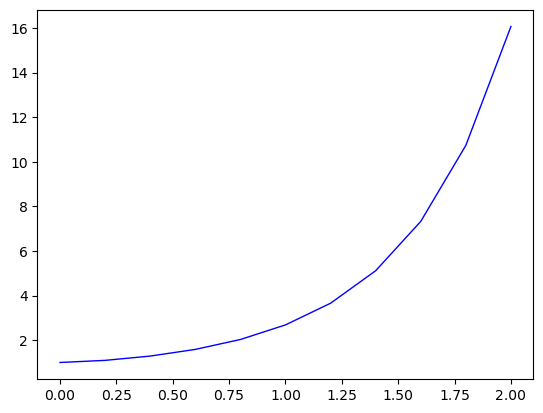

In [2]:
# EulerMidtpunkt.m

# Skript som implementerer Eulers midtpunktsmetode.
# Input: Startkravet y(x0)=y0 og F(x,y),
# som definerer differensiallikninga ved
# y'=F(x,y)

# Startkrav og maksimal x-verdi
x0 = 0
y0 = 1
x_max = 2

def F(x,y):
    """Differensiallikning"""
    return 3/2*np.sqrt(x)*y

# Steglengda
#N=input('Gi talet på steg: ')
N = 10
h = (x_max-x0)/N

# Vektor med x-verdiar
x_vektor = np.arange(x0, x_max+h, h)

# Initerar x og y
x = x0
y = y0

# for-løkke som implementerer Eulers metode
y_vektor = np.zeros_like(x_vektor)
y_vektor[0] = y0
for indeks in range(0, N):
    # Eulers midtpunktsmetode
    x_hatt = x+h/2
    y_hatt = y+F(x,y)*h/2
    # Oppdaterer vektor med y-verdiar
    y = y+F(x_hatt,y_hatt)*h
    y_vektor[indeks+1] = y
    # Oppdaterer x
    x = x+h

# Plottar resultatet
plt.plot(x_vektor, y_vektor, 'b-', linewidth=1)

In [6]:
# EulersMetAllokering.m

# Kommentart inn:
# Skriptet allokerar vektoren med y-verdiar.
# Kommentert ut:
# Skjøting av y-vektoren i for-løkka.

"""Enkel implementering av Eulers metode
for startverdiproblemet y'=x+y, y(0)=1.
"""

# Bibliotek
import time
import numpy as np

x0 = 0                        # Startkrav
y0 = 1
x_max = 10

N = 10**5                     # Oppdeling
h = (x_max-x0)/N

# Vektor med x-verdiar
x_vektor = np.arange(x0, x_max+h, h)
#y_vektor = np.empty(0)
y_vektor = np.zeros_like(x_vektor)

x = x0
y = y0
#y_vektor = np.append(y_vektor, y0)
y_vektor[0] = y0
start = time.time()           # Startar klokka
for i in range(0, N):
    y = y+(x+y)*h             # Oppdaterer y
    # Skriv y-verdien til vektor
    #y_vektor = np.append(y_vektor, y)
    y_vektor[i+1] = y         # Skriv y-verdien til vektor
    x = x+h                   # Oppdaterer x

tid = time.time() - start     # Stoppar klokka
print(f'tid = {tid:.4e}')

tid = 2.4020e-02


In [12]:
# Varierende N med og uten allokering (log- og lin-plot)

x0 = 0                        # Startkrav
y0 = 1
x_max = 10

N_vektor = np.linspace(10**3, 10**6, 15, dtype=int)
h_vektor = (x_max-x0)/N_vektor

uten_tid = np.zeros_like(h_vektor)
med_tid = np.zeros_like(h_vektor)

for k, N in enumerate(N_vektor):
    print(k)
    h = h_vektor[k]
    
    ### Uten allokering
    
    # Vektor med x-verdiar
    x_vektor = np.arange(x0, x_max+h, h)
    y_vektor = np.zeros_like(x_vektor)
    
    x = x0
    y = y0
    y_vektor[0] = y0
    start = time.time()           # Startar klokka
    for i in range(0, N):
        y = y+(x+y)*h             # Oppdaterer y
        y_vektor[i+1] = y         # Skriv y-verdien til vektor
        x = x+h                   # Oppdaterer x
    
    tid = time.time() - start     # Stoppar klokka

    med_tid[k] = tid
    
    ### Med allokering
    
    # Vektor med x-verdiar
    x_vektor = np.arange(x0, x_max+h, h)
    y_vektor = np.empty(0)
    
    x = x0
    y = y0
    y_vektor = np.append(y_vektor, y0)
    y_vektor[0] = y0
    start = time.time()           # Startar klokka
    for i in range(0, N):
        y = y+(x+y)*h             # Oppdaterer y
        # Skriv y-verdien til vektor
        y_vektor = np.append(y_vektor, y)
        x = x+h                   # Oppdaterer x
    
    tid = time.time() - start     # Stoppar klokka

    uten_tid[k] = tid

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


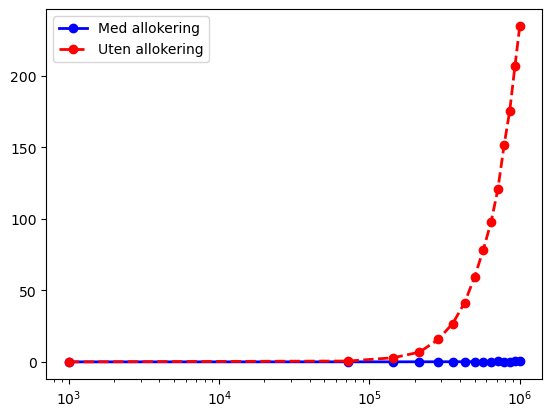

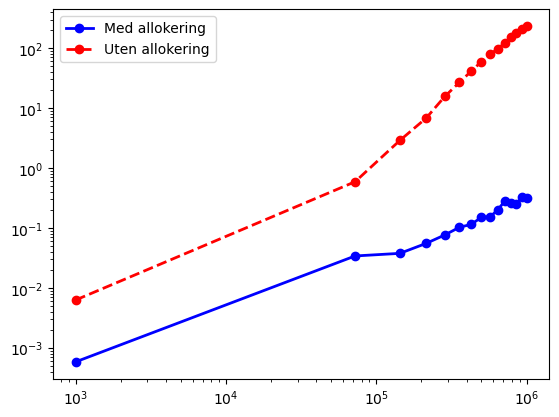

In [30]:
plt.semilogx(N_vektor, med_tid, 'bo-', 
         linewidth=2, label='Med allokering')
plt.semilogx(N_vektor, uten_tid, 'ro--', 
         linewidth=2, label='Uten allokering')
#plt.ticklabel_format(useMathText=True)
plt.legend()
plt.show()

plt.loglog(N_vektor, med_tid, 'bo-', 
         linewidth=2, label='Med allokering')
plt.loglog(N_vektor, uten_tid, 'ro--', 
         linewidth=2, label='Uten allokering')
plt.legend()
plt.show()

Gi talet på steg:  100


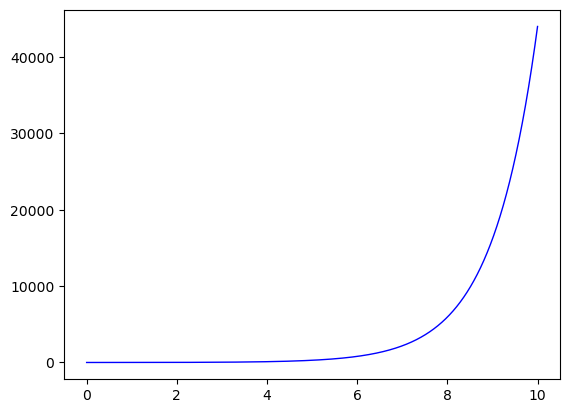

In [4]:
# EulersMetFaerrePkt.m

# Skript som implementerer Eulers metode.
# Input: Startkravet y(x0)=y0 og F(x,y),
# som definerer differensiallikninga ved
# y'=F(x,y).
# Skriptet brukar færre punkt til plotting 
# enn dei som blir rekna ut med Eulers metode.

# Startkrav og maksimal x-verdi
x0 = 0
y0 = 1
x_max = 2

def F(x,y):
    """Differensiallikning"""
    return 3/2*np.sqrt(x)*y

# Steglengda
N = int(input('Gi talet på steg: '))
h = (x_max-x0)/N

# Initerar x og y
x = x0
y = y0

# for-løkke som implementerer Eulers metode
x_vektor[1] = x0
y_vektor[1] = y0
indeks = 0
for n in range(0, N):
    # Eulers framovermetode
    y = y+F(x,y)*h
    if np.mod(n, 10) == 0:
        # Oppdaterer vektor med x- og y-verdiar
        x_vektor[indeks] = x
        y_vektor[indeks] = y
        indeks = indeks+1
    # Oppdaterer x
    x = x+h

# Plottar resultatet
plt.plot(x_vektor, y_vektor, 'b-', linewidth=1)
plt.show()

Gi talet på steg:  10


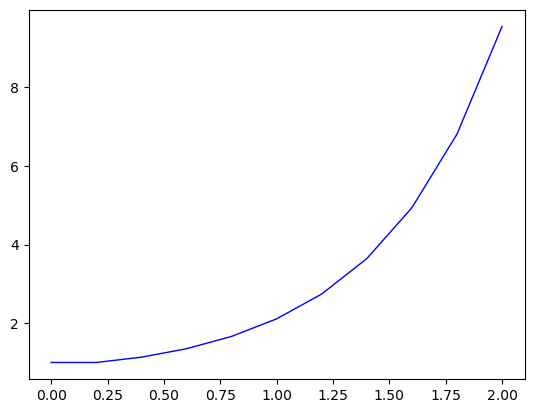

In [6]:
# EulersMetode.m

"""Skript som implementerer Eulers metode.

Input: Startkravet y(x0)=y0 og F(x,y),
som definerer differensiallikninga ved
y'=F(x,y)
"""

# Startkrav og maksimal x-verdi
x0 = 0
y0 = 1
x_max = 2

def F(x,y):
    """Differensiallikning"""
    return 3/2*np.sqrt(x)*y

# Steglengda
N = int(input('Gi talet på steg: '))
h = (x_max-x0)/N

# Vektor med x-verdiar
x_vektor = np.arange(x0, x_max+h, h)

# Initerar x og y
x = x0
y = y0

# for-løkke som implementerer Eulers metode
y_vektor = np.zeros_like(x_vektor)
y_vektor[0] = y0
for indeks in range(0, N):
    # Eulers framovermetode
    y = y+F(x,y)*h
    # Oppdaterer vektor med y-verdiar
    y_vektor[indeks+1] = y
    # Oppdaterer x
    x = x+h

# Plottar resultatet
plt.plot(x_vektor, y_vektor, 'b-', linewidth=1)
plt.show()